In [ ]:
!pip install dash pyngrok --upgrade
!ngrok authtoken 22BRd0pJtelRAl3E3vuHAnpu6Em_2txAsXLSVuao7kgEXo8Z9 # Replace <YOUR_AUTHTOKEN> with your actual token


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 30.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 10.6 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.0
    Uninstalling Flask-3.1.0:
      Successfully uninstalled Flask-3.1.0
Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
import dash
from dash import dcc, html, Input, Output
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import plotly.express as px
from pyngrok import ngrok

# Generate synthetic data for clustering
n_samples = 300
n_features = 2
n_clusters = 4
random_state = 42

data, _ = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_clusters, random_state=random_state)
df = pd.DataFrame(data, columns=["Feature 1", "Feature 2"])
df.head()




,Feature 1,Feature 2
0,-9.297689,6.473679
1,-9.698741,6.938967
2,-1.686653,7.793442
3,-7.097308,-5.781333
4,-10.876452,6.315437


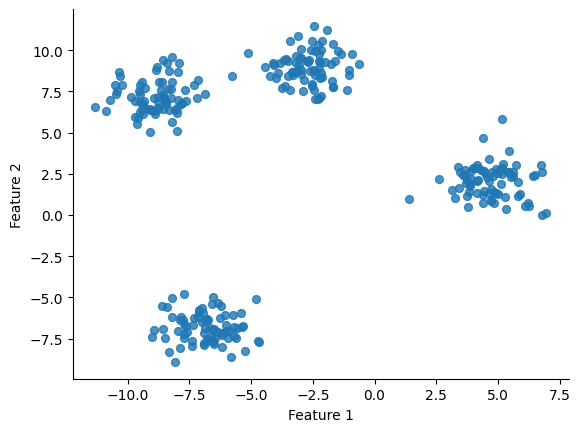

In [ ]:
# @title Feature 1 vs Feature 2

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Feature 1', y='Feature 2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
import dash
from dash import dcc, html, Input, Output
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import plotly.express as px
import plotly.graph_objects as go

# Generate synthetic data for clustering
n_samples = 300
n_features = 2
random_state = 42

data, _ = make_blobs(n_samples=n_samples, n_features=n_features, centers=4, random_state=random_state)
base_df = pd.DataFrame(data, columns=["Feature 1", "Feature 2"])  # Use a base DataFrame

# Initialize Dash app
app = dash.Dash(__name__)

# Layout of the dashboard
app.layout = html.Div([
    html.H1("K-Means Clustering Dashboard", style={"textAlign": "center"}),

    # Controls
    html.Div([
        html.Label("Select Number of Clusters:"),
        dcc.Slider(
            id="num-clusters",
            min=1,
            max=10,
            step=1,
            value=4,
            marks={i: str(i) for i in range(1, 11)}
        ),
    ], style={"width": "50%", "margin": "0 auto"}),

    # Evaluation metrics
    html.Div([
        html.H4("Clustering Evaluation Metric"),
        html.P(id="inertia-output", style={"fontSize": "16px"}),
    ], style={"textAlign": "center", "marginTop": "20px"}),

    # Clustering graph
    dcc.Graph(id="cluster-graph"),

    # Elbow method graph
    html.Div([
        html.H4("Elbow Method"),
        dcc.Graph(id="elbow-graph"),
    ], style={"marginTop": "30px"})
])

@app.callback(
    [Output("cluster-graph", "figure"),
     Output("inertia-output", "children"),
     Output("elbow-graph", "figure")],
    [Input("num-clusters", "value")]
)
def update_dashboard(num_clusters):
    # Create a fresh copy of the DataFrame to avoid side effects
    df = base_df.copy()

    # Apply K-means clustering
    kmeans = KMeans(n_clusters=num_clusters, random_state=random_state)
    df["Cluster"] = kmeans.fit_predict(df[["Feature 1", "Feature 2"]])
    inertia = kmeans.inertia_

    # Clustering graph
    cluster_fig = px.scatter(
        df, x="Feature 1", y="Feature 2", color=df["Cluster"].astype(str),
        title=f"K-Means Clustering with {num_clusters} Clusters",
        color_discrete_sequence=px.colors.qualitative.Set1
    )
    cluster_fig.update_layout(legend_title="Cluster", template="plotly_white")

    # Elbow method
    inertias = []
    cluster_range = range(1, 11)
    for k in cluster_range:
        kmeans = KMeans(n_clusters=k, random_state=random_state)
        kmeans.fit(df[["Feature 1", "Feature 2"]])
        inertias.append(kmeans.inertia_)

    elbow_fig = go.Figure()
    elbow_fig.add_trace(go.Scatter(
        x=list(cluster_range), y=inertias, mode="lines+markers", name="Inertia"
    ))
    elbow_fig.update_layout(
        title="Elbow Method to Determine Optimal Clusters",
        xaxis_title="Number of Clusters",
        yaxis_title="Inertia",
        template="plotly_white"
    )

    # Display inertia as a clustering evaluation metric
    inertia_text = f"Inertia (Sum of Squared Distances): {inertia:.2f}"

    return cluster_fig, inertia_text, elbow_fig

if __name__ == "__main__":
    # Start ngrok tunnel
    public_url = ngrok.connect(8050)  # Port number of your Dash app
    print(f"Public URL: {public_url}")
    # Run the Dash app
    app.run_server(debug=True)


Public URL: NgrokTunnel: "https://9992-34-125-41-110.ngrok-free.app" -> "http://localhost:8050"


<IPython.core.display.Javascript object>